In [1]:
import numpy as np
import tensorflow as tf
import random

/Users/diegobarbosa/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
W = tf.Variable( tf.random_uniform((784, 100), -1, 1) )
b = tf.Variable( tf.zeros((100,)) )

x = tf.placeholder(tf.float32, (100, 784))

h = tf.nn.relu( tf.matmul(x, W) + b )

session = tf.Session()
session.run(tf.global_variables_initializer())
session.run(h, {x: np.random.randn(100, 784)})

array([[10.502027  ,  0.        ,  0.        , ...,  0.        ,
         7.7411623 ,  0.        ],
       [ 0.        , 19.968948  ,  0.        , ...,  2.54908   ,
        14.874125  ,  0.        ],
       [28.716293  ,  9.070106  , 11.963858  , ...,  0.        ,
         0.        , 21.664495  ],
       ...,
       [30.501682  ,  0.63523245,  0.        , ...,  0.        ,
        10.860744  ,  0.        ],
       [ 0.        , 37.862114  ,  7.1523776 , ..., 11.291481  ,
         0.        ,  0.        ],
       [ 8.928125  , 16.414677  ,  0.        , ...,  0.        ,
         0.        , 11.405872  ]], dtype=float32)

In [3]:
session.close()

In [4]:
import os
import skimage 
from skimage import data

In [5]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels

ROOT_PATH = "/Users/diegobarbosa/Downloads"
train_data_directory = os.path.join(ROOT_PATH, "Training")
test_data_directory = os.path.join(ROOT_PATH, "Testing")

images, labels = load_data(train_data_directory)

In [6]:
images1=np.array(images)
labels1=np.array(labels)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

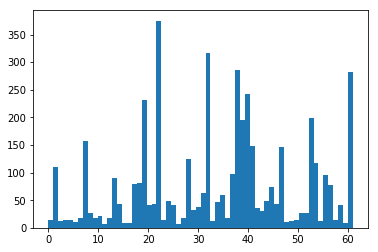

In [8]:
plt.hist(labels1,62)
plt.show()

In [9]:
traffic_signs=[300,2250,3560,4000]

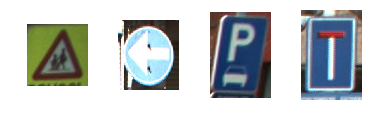

In [10]:
for i in range(len(traffic_signs)):
    plt.subplot(1,4,i+1)
    plt.axis('off')
    plt.imshow(images1[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
plt.show()

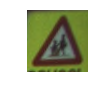

shape:(62, 61, 3),min:3,max:160


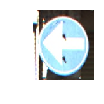

shape:(110, 96, 3),min:3,max:255


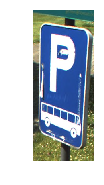

shape:(379, 153, 3),min:0,max:255


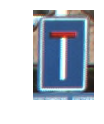

shape:(100, 68, 3),min:17,max:255


In [11]:
#Determine the (random) indexes of the images
traffic_signs=[300,2250,3650,4000]
#Fill out the subplots with the random images and add shape, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1,4,i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape:{0},min:{1},max:{2}".format(images[traffic_signs[i]].shape, images[traffic_signs[i]].min(),images[traffic_signs[i]].max()))

In [12]:
unique_labels=set(labels)

In [13]:
plt.figure(figsize=(15,15))

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

In [24]:
i=1

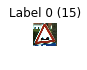

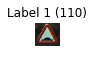

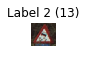

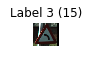

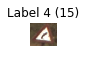

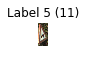

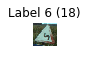

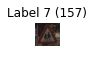

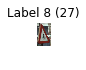

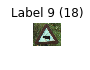

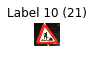

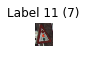

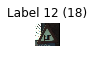

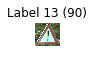

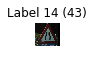

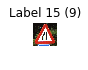

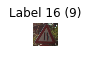

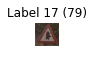

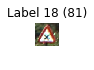

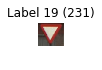

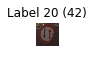

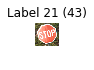

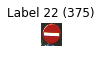

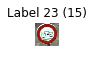

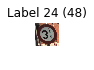

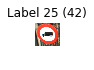

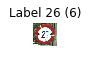

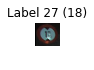

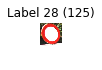

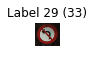

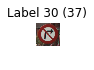

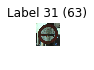

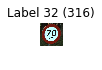

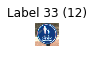

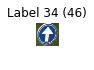

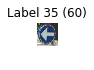

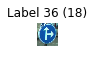

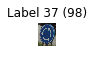

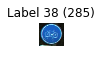

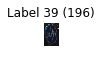

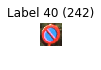

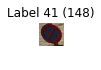

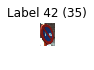

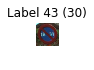

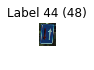

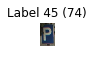

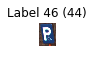

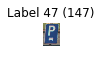

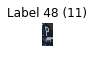

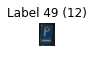

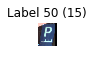

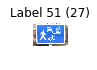

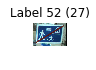

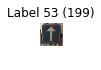

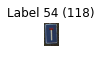

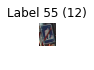

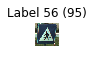

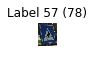

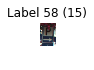

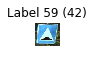

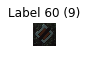

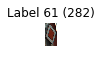

In [25]:
for label in unique_labels:
    image=images[labels.index(label)]
    plt.subplot(8,8,i)
    plt.axis('off')
    plt.title("Label {0} ({1})".format(label,labels.count(label)))
    i+=1
    plt.imshow(image)
    plt.show()

In [26]:
#Let's start first with extracting some features, we need to rescale the images and convert the images to grayscale.
#For detection, however, the color does play a big part!

In [33]:
from skimage import transform
#rescale the images in the 'images' array
images28=[transform.resize(image,(28,28)) for image in images]

In [34]:
from skimage.color import rgb2gray
images28=np.array(images28)
images28=rgb2gray(images28)

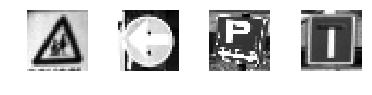

In [35]:
traffic_signs=[300,2250,3650,4000]
for i in range (len(traffic_signs)):
    plt.subplot(1,4,i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]],cmap="gray")
    plt.subplots_adjust(wspace=0.5)
plt.show()

In [39]:
import tensorflow as tf

In [40]:
x=tf.placeholder(dtype=tf.float32,shape=[None,28,28])
y=tf.placeholder(dtype=tf.int32,shape=[None])
#Flatten the input data
images_flat=tf.contrib.layers.flatten(x)
#fully connected layer
logits=tf.contrib.layers.fully_connected(images_flat,62,tf.nn.relu)
#define a loss function
loss=tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits))
#define an optimizer
train_op=tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
#convert logits to label indexes
correct_pred=tf.argmax(logits,1)
#Define an accuracy metric
accuracy=tf.reduce_mean(tf.cast(correct_pred,tf.float32))


In [41]:
print("images_flat:",images_flat)
print("logits:",logits)
print("loss:",loss)
print("predicted_labels:",correct_pred)

('images_flat:', <tf.Tensor 'Flatten/flatten/Reshape:0' shape=(?, 784) dtype=float32>)
('logits:', <tf.Tensor 'fully_connected/Relu:0' shape=(?, 62) dtype=float32>)
('loss:', <tf.Tensor 'Mean:0' shape=() dtype=float32>)
('predicted_labels:', <tf.Tensor 'ArgMax:0' shape=(?,) dtype=int64>)


In [42]:
tf.set_random_seed(1234)
sess=tf.Session()

sess.run(tf.global_variables_initializer())
for i in range(201):
    print('EPOCH',i)
    _,accuracy_val=sess.run([train_op,accuracy],feed_dict={x:images28,y:labels})
    if i%10==0:
        print("Loss :", loss)
    print('DONE WITH EPOCH')

('EPOCH', 0)
('Loss :', <tf.Tensor 'Mean:0' shape=() dtype=float32>)
DONE WITH EPOCH
('EPOCH', 1)
DONE WITH EPOCH
('EPOCH', 2)
DONE WITH EPOCH
('EPOCH', 3)
DONE WITH EPOCH
('EPOCH', 4)
DONE WITH EPOCH
('EPOCH', 5)
DONE WITH EPOCH
('EPOCH', 6)
DONE WITH EPOCH
('EPOCH', 7)
DONE WITH EPOCH
('EPOCH', 8)
DONE WITH EPOCH
('EPOCH', 9)
DONE WITH EPOCH
('EPOCH', 10)
('Loss :', <tf.Tensor 'Mean:0' shape=() dtype=float32>)
DONE WITH EPOCH
('EPOCH', 11)
DONE WITH EPOCH
('EPOCH', 12)
DONE WITH EPOCH
('EPOCH', 13)
DONE WITH EPOCH
('EPOCH', 14)
DONE WITH EPOCH
('EPOCH', 15)
DONE WITH EPOCH
('EPOCH', 16)
DONE WITH EPOCH
('EPOCH', 17)
DONE WITH EPOCH
('EPOCH', 18)
DONE WITH EPOCH
('EPOCH', 19)
DONE WITH EPOCH
('EPOCH', 20)
('Loss :', <tf.Tensor 'Mean:0' shape=() dtype=float32>)
DONE WITH EPOCH
('EPOCH', 21)
DONE WITH EPOCH
('EPOCH', 22)
DONE WITH EPOCH
('EPOCH', 23)
DONE WITH EPOCH
('EPOCH', 24)
DONE WITH EPOCH
('EPOCH', 25)
DONE WITH EPOCH
('EPOCH', 26)
DONE WITH EPOCH
('EPOCH', 27)
DONE WITH EPOCH
('

In [43]:
import random

In [45]:
sample_indexes=random.sample(range(len(images28)),10)
sample_images=[images28[i] for i in sample_indexes]
sample_labels=[labels[i] for i in sample_indexes]

In [48]:
predicted= sess.run([correct_pred], feed_dict={x:sample_images})[0]
print(sample_labels)
print(predicted)

[41, 47, 22, 38, 23, 20, 22, 35, 37, 6]
[40 47 22 38 32 20 22 22 61 13]


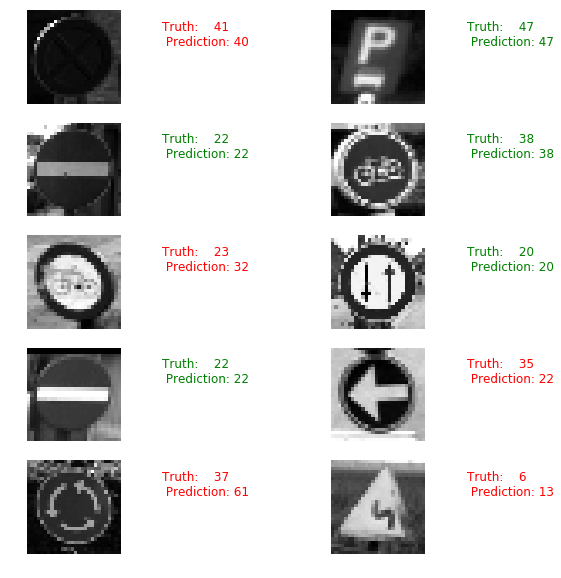

In [50]:
#Display the predictions and the ground truth visually
fig=plt.figure(figsize=(10,10))
for i in range(len(sample_images)):
    truth =sample_labels[i]
    prediction=predicted[i]
    plt.subplot(5,2,1+i)
    plt.axis('off')
    color='green' if truth==prediction else 'red'
    plt.text(40,10,"Truth:    {0}\n Prediction: {1}".format(truth,prediction),fontsize=12,color=color)
    plt.imshow(sample_images[i],cmap="gray")